In [126]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mode,skew,skewtest

from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [99]:
data=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/Breast Cancer/data.csv')

In [100]:
data.drop('Unnamed: 32',1,inplace=True)

In [101]:
data.head(4)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300


In [102]:
data.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

In [103]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [104]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [105]:
#Lets break the data into training and test sets

train,test=train_test_split(data,train_size=0.95,test_size=0.05)
train.size,test.size

(17280, 928)

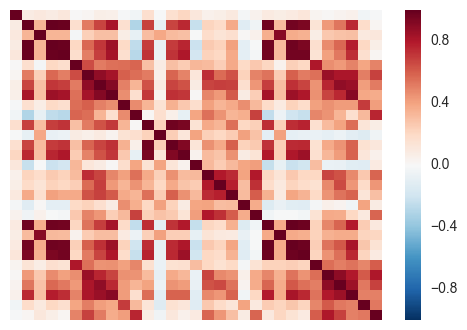

In [106]:
sns.heatmap(train.corr(),xticklabels=False,yticklabels=False)

In [107]:
# We observe that a lot of features are related to each other. 

train.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
310,893783,B,11.7,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,...,12.61,26.55,80.92,483.1,0.1223,0.1087,0.07915,0.05741,0.3487,0.06958


In [108]:
train_labels=train['diagnosis']
test_labels=test['diagnosis']

#We drop the id and diagnosis columns in train and test

train.drop(['id','diagnosis'],1,inplace=True)
test.drop(['id','diagnosis'],1,inplace=True)

/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/adityavyas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


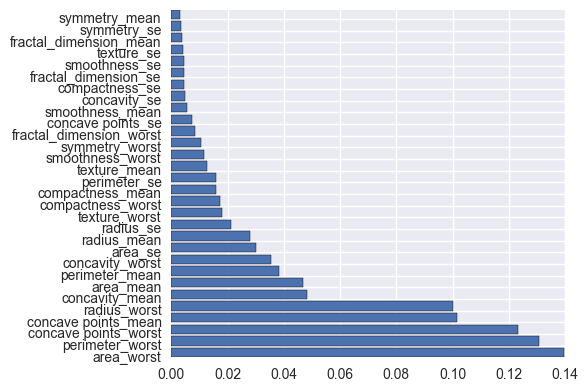

In [109]:
#We run a basic random forest on the data to know the feature importances.

forest=ensemble.RandomForestClassifier(n_estimators=100,n_jobs=-1)
forest.fit(train,train_labels)

importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
feature=train.columns
plt.yticks(range(len(indices)),feature[indices],fontsize=10)
plt.barh(range(len(indices)),importances[indices])
plt.tight_layout()

Ok so we see that the concave_points_worst has the highest importance. Infact area,radius worst also have high importances. Similarly features pertaining to smoothness,symmetry and fractal dimensions are not so important.

In [110]:
# We will rearrange the columns based on the feature importances

train2=train.ix[:,feature[indices]]
test2=test.ix[:,feature[indices]]

In [111]:
train2.head(2)

,area_worst,perimeter_worst,concave points_worst,concave points_mean,radius_worst,concavity_mean,area_mean,perimeter_mean,concavity_worst,area_se,...,concave points_se,smoothness_mean,concavity_se,compactness_se,fractal_dimension_se,smoothness_se,texture_se,fractal_dimension_mean,symmetry_se,symmetry_mean
310,483.1,80.92,0.05741,0.01148,12.61,0.01583,418.7,74.33,0.07915,11.28,...,0.007638,0.08814,0.01042,0.00911,0.001661,0.006064,1.430,0.06128,0.02349,0.1936
80,525.1,84.53,0.06127,0.02233,13.11,0.04591,401.5,73.81,0.17550,24.62,...,0.007506,0.11020,0.02586,0.01706,0.003976,0.010370,2.174,0.07005,0.01816,0.1842


In [112]:
#Lets look at the overall distribution among features

train2.describe()

,area_worst,perimeter_worst,concave points_worst,concave points_mean,radius_worst,concavity_mean,area_mean,perimeter_mean,concavity_worst,area_se,...,concave points_se,smoothness_mean,concavity_se,compactness_se,fractal_dimension_se,smoothness_se,texture_se,fractal_dimension_mean,symmetry_se,symmetry_mean
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,884.619444,107.542333,0.115447,0.049257,16.303391,0.089372,655.317963,92.061889,0.274839,40.068620,...,0.011877,0.096498,0.032141,0.025653,0.003811,0.007044,1.215185,0.062838,0.020509,0.181176
std,573.551548,33.818455,0.065839,0.038821,4.861236,0.079666,347.368297,24.165909,0.209638,41.523116,...,0.006197,0.013894,0.030540,0.018010,0.002675,0.003000,0.546429,0.007010,0.008193,0.027132
min,240.100000,56.650000,0.000000,0.000000,8.952000,0.000000,178.800000,47.920000,0.000000,6.802000,...,0.000000,0.052630,0.000000,0.003012,0.000895,0.001713,0.360200,0.049960,0.007882,0.116700
25%,513.975000,84.057500,0.065125,0.020368,13.002500,0.029575,418.325000,74.967500,0.115925,17.840000,...,0.007701,0.086688,0.015140,0.013437,0.002254,0.005214,0.829700,0.057923,0.015195,0.162000
50%,684.550000,97.620000,0.100550,0.033455,14.910000,0.061880,546.200000,86.260000,0.229850,24.565000,...,0.011000,0.096035,0.026065,0.020475,0.003195,0.006391,1.108000,0.061670,0.018765,0.179250
75%,1106.750000,126.950000,0.162500,0.074928,19.097500,0.132150,794.600000,105.725000,0.386200,45.440000,...,0.014793,0.105300,0.041587,0.032217,0.004559,0.008129,1.474250,0.066120,0.023482,0.195400
max,4254.000000,251.200000,0.291000,0.201200,36.040000,0.426800,2501.000000,186.900000,1.252000,542.200000,...,0.052790,0.163400,0.396000,0.135400,0.029840,0.031130,4.885000,0.097440,0.078950,0.304000


In [114]:
#We will need to normalize values because there is huge variation among the values. The area_mean has value 661 while
#the fractional_dimension_worst has mean value 0.083

scaler=StandardScaler(with_mean=True,with_std=True)
scaled_features=scaler.fit_transform(train2)
scaled_train_df=pd.DataFrame(scaled_features,index=train2.index,columns=train2.columns)

scaled_features2=scaler.fit_transform(test2)
scaled_test_df=pd.DataFrame(scaled_features2,index=test2.index,columns=test2.columns)

In [121]:
#We will join the labels

train3=scaled_train_df.join(train_labels)
test3=scaled_test_df.join(test_labels)

In [130]:
# We create training,validation and testing datasets

TRAIN,VAL=train_test_split(train3,train_size=0.8)
TEST=test3
x_TRAIN,y_TRAIN=TRAIN.drop('diagnosis',1),TRAIN['diagnosis']
x_VAL,y_VAL=VAL.drop('diagnosis',1),VAL['diagnosis']
x_TEST,y_TEST=TEST.drop('diagnosis',1),TEST['diagnosis']

In [133]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression


logreg=LogisticRegression()
logreg.fit(x_TRAIN,y_TRAIN)
y_pred_logreg=logreg.predict(x_VAL)
val_accuracy_logreg=accuracy_score(y_pred_logreg,y_VAL)
val_accuracy_logreg

y_pred_logreg_=logreg.predict(x_TEST)
test_accuracy_logreg=accuracy_score(y_pred_logreg_,y_TEST)
test_accuracy_logreg

1.0

In [134]:
#Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_TRAIN,y_TRAIN)
y_pred_forest=forest.predict(x_VAL)
val_accuracy_forest=accuracy_score(y_pred_forest,y_VAL)

y_pred_forest_=forest.predict(x_TEST)
test_accuracy_forest=accuracy_score(y_pred_forest_,y_TEST)
'validation accuracy= '+str(val_accuracy_forest)+'   '+'final accuracy= '+str(test_accuracy_forest)

'validation accuracy= 0.953703703704   final accuracy= 0.931034482759'